In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import uproot
import pandas as pd

In [3]:
df_MC = uproot.open('HyperTree_MC_Signal.root')['HyperTree_MC_Signal'].pandas.df()

In [4]:
df_MC

,V0pt,TPCnSigmaHe3,DistOverP,InvMass,ArmenterosAlpha,V0CosPA,V0Chi2,PiProngPt,He3ProngPt,ProngsDCA,He3ProngPvDCA,PiProngPvDCA,NpidClustersHe3,TPCnSigmaPi,Lrec
0,1.801913,0.500,3.079487,2.992206,0.848579,0.997848,0.00,0.194784,1.619431,0.77,1.000000,1.000000,120.0,0.125,6.497778
1,2.850354,0.625,5.009816,2.992606,-0.865971,0.999918,0.00,0.193109,2.667301,0.58,0.667969,1.000000,124.0,1.125,14.319689
2,3.941775,-0.500,2.213483,2.993389,0.799560,0.999990,0.00,0.408496,3.537629,0.00,0.156250,1.000000,127.0,-1.000,9.055533
3,5.601911,0.250,3.571688,2.992445,-0.892057,0.999999,0.00,0.276571,5.337098,0.40,0.519531,1.000000,145.0,-0.375,22.357100
4,2.040387,0.625,6.642829,2.986990,-0.794670,0.999532,0.00,0.215732,1.830621,0.68,0.910156,1.000000,87.0,-0.375,13.555475
5,3.432498,-2.000,3.757954,2.994277,-0.876915,0.997813,0.00,0.245561,3.211884,0.39,1.000000,1.000000,114.0,1.000,13.172921
6,2.269736,0.500,2.579412,2.987460,-0.806079,0.999986,0.00,0.245714,2.032371,0.01,0.257812,1.000000,124.0,0.125,6.225307
7,7.503637,-0.625,1.469103,2.993088,0.858113,0.999996,0.00,0.532635,6.979688,0.00,0.179688,1.000000,72.0,-0.625,11.105997
8,4.923028,-0.500,16.711594,2.994217,0.859516,0.999945,0.00,0.412371,4.510935,0.32,1.000000,1.000000,145.0,0.000,101.125900
9,2.572411,1.625,1.313258,2.992268,0.875655,0.999982,0.00,0.200536,2.408338,0.02,0.156250,1.000000,111.0,-0.375,3.489885


In [3]:
df_data = uproot.open('HyperTree_Data.root')['HyperTree_Data'].pandas.df()

## Uso i tagli standard

In [6]:
df_data=df_data.astype('float')

In [113]:
hyper_df=df_data.query('NpidClustersHe3>100 and ProngsDCA<0.7 and He3ProngPt>1.8 and 2.991*DistOverP<28 and V0CosPA>0.995')

In [114]:
hyper_df

,V0pt,TPCnSigmaHe3,DistOverP,InvMass,ArmenterosAlpha,V0CosPA,V0Chi2,PiProngPt,He3ProngPt,ProngsDCA,He3ProngPvDCA,PiProngPvDCA,NpidClustersHe3,TPCnSigmaPi,Lrec
4051,2.297202,-2.75,4.267421,2.952389,0.872101,0.998767,0.0,0.146465,2.151225,0.55,0.256,0.114,148.0,-2.50,10.022147
4060,9.868563,2.00,8.242251,3.113723,0.973081,0.998100,0.0,0.165010,9.721455,0.11,0.256,0.256,116.0,-1.00,84.233536
5327,1.931910,-4.00,4.718936,2.963688,0.862515,0.999522,0.0,0.126183,1.806042,0.53,0.256,0.256,101.0,0.00,9.182902
8967,1.962140,1.75,6.648551,3.128157,0.895402,0.995340,0.0,0.282420,1.865032,0.56,0.256,0.256,121.0,-0.75,13.961224
12566,2.505391,-4.00,5.755359,3.191828,0.467027,0.997664,0.0,0.691557,1.817575,0.09,0.256,0.256,141.0,-2.25,16.526014
18350,3.280194,0.50,3.681108,3.077430,0.808035,0.997765,0.0,0.343583,2.954834,0.40,0.256,0.256,138.0,3.50,12.100310
21542,2.201268,0.75,1.439005,3.107208,0.845481,0.995776,0.0,0.228903,1.974739,0.46,0.256,0.256,150.0,0.75,3.254488
21543,2.072284,0.75,1.413225,3.000778,0.915323,0.995001,0.0,0.152766,1.974739,0.42,0.256,0.256,150.0,-2.25,3.096290
22729,3.480727,2.00,7.068511,3.022056,0.958757,0.999639,0.0,0.126212,3.407385,0.03,0.256,0.256,125.0,-2.25,24.683798
24241,1.817540,-3.50,7.554059,3.115885,0.978011,0.999056,0.0,0.161419,1.886427,0.53,0.256,0.256,139.0,-1.00,14.648778


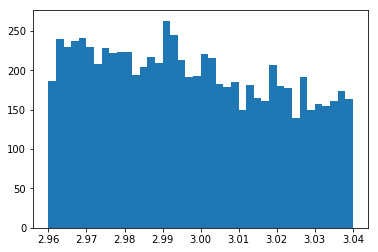

In [115]:
n,bins,_=plt.hist(hyper_df['InvMass'],bins=40,range=[2.96,3.04],histtype='barstacked');

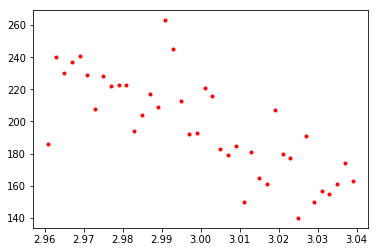

In [116]:
bin_centers = 0.5*(bins[1:]+bins[:-1])
plt.plot(bin_centers,n,'r.')

# Creo e salvo pandas per ML

In [11]:
df_Bkg = df_data.query('InvMass<2.96 or InvMass>3.04 and V0pt<=10')
df_Bkg=df_Bkg[0:10*len(df_MC)]
df_Bkg['y']=0
df_MC['y']=1

In [12]:
df_ML= pd.concat([df_MC,df_Bkg])
df_ML.to_pickle('df_ML.pkl')

In [4]:
df_Sig_data=df_data.query('2.96<InvMass<3.04 and V0pt<=10')

In [5]:
df_Sig_data.to_pickle('df_Sig_data.pkl')